In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.preprocessing import MinMaxScaler

In [2]:
#d_train = pd.read_csv('/Users/kaiding/Documents/MIDS/W207 Machine Learning/forest-cover-type-prediction (1)/train.csv')
d_train = pd.read_csv('C:/Users/a_com/OneDrive/Desktop/W207/Project/train.csv')

In [3]:
pd.set_option('display.max_columns', None)
d_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
# No Missing values
# From column "Wilderness_Area", everything is dummy/indicator variable.
pd.set_option('display.max_columns', None)
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

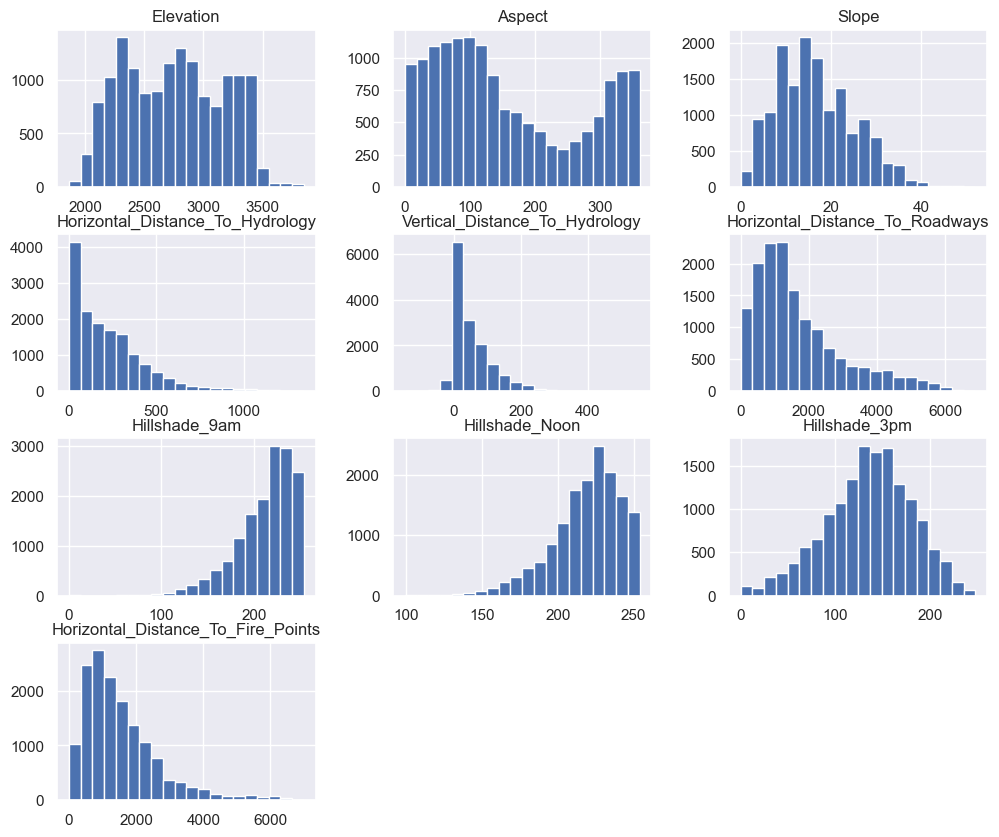

In [5]:
numeric_columns = ['Elevation', 'Aspect', 'Slope',
'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

d_train[numeric_columns].hist(figsize=(12,10),bins=20)
plt.show()


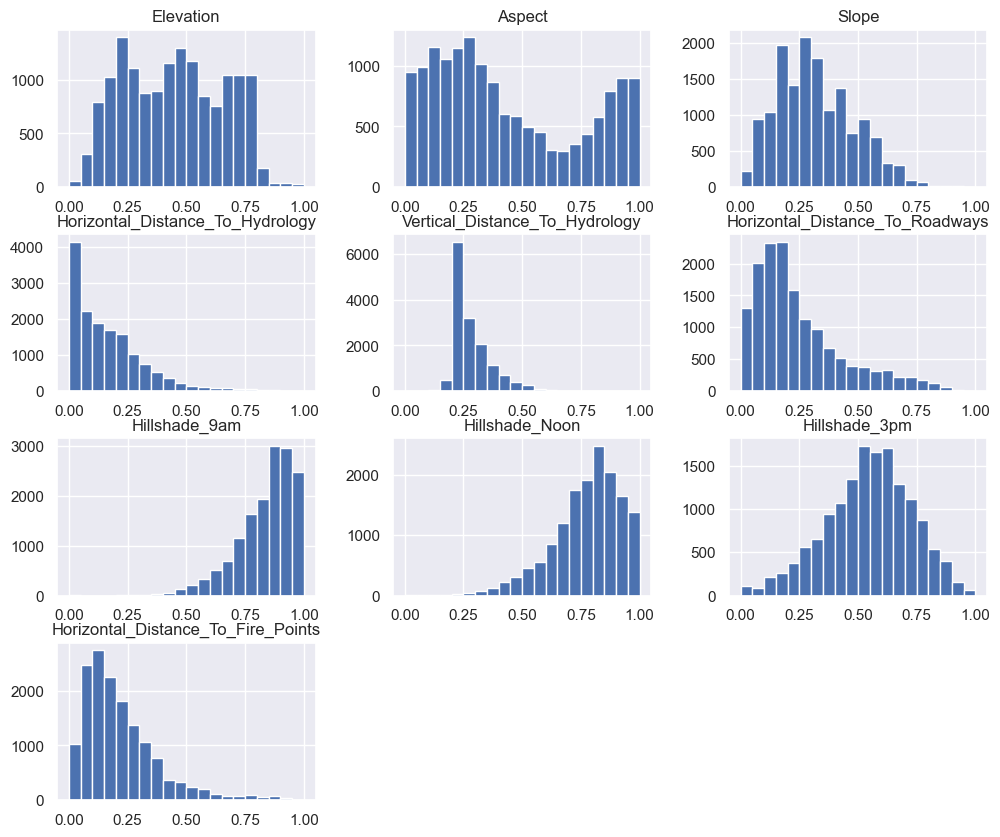

In [6]:
# Scale the variables

X_train = d_train.copy()
y_train = X_train.pop("Cover_Type")

# Standardize the numerical columns
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

#numeric columns distribution
#Forest cover type (1-7 evenly distributed with 2160 each) - No rare types
X_train[numeric_columns].hist(figsize=(12,10),bins=20)
plt.show()


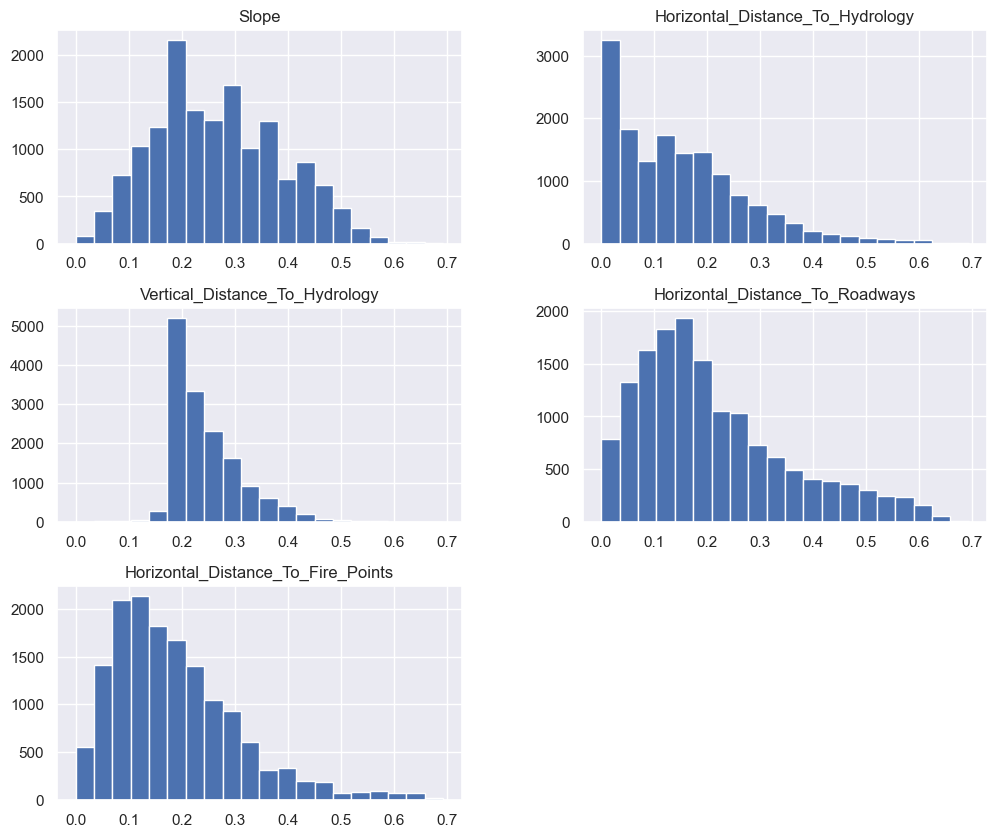

In [7]:
# which columns are skewed?
skewed = X_train[numeric_columns].skew()
skewed = skewed[skewed > 0.5]
skewed

# transform the skewed columns
skewed = skewed.index
X_train[skewed] = np.log1p(X_train[skewed])
#plot transformed columns
X_train[skewed].hist(figsize=(12,10),bins=20)
plt.show()



In [8]:
X_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,0.446285,0.435213,0.268182,0.148184,0.245865,0.211376,0.837418,0.773972,0.544726,0.188111,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,4364.91237,0.210311,0.305794,0.121299,0.124525,0.065345,0.143608,0.120320,0.147109,0.185061,0.119840,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3780.75000,0.258308,0.180556,0.175891,0.048684,0.195332,0.105157,0.771654,0.696774,0.427419,0.099293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7560.50000,0.447633,0.350000,0.253449,0.125776,0.226566,0.174795,0.866142,0.800000,0.556452,0.165182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11340.25000,0.624874,0.725000,0.352821,0.219713,0.278713,0.284775,0.925197,0.877419,0.673387,

In [9]:
#Per above data summary, Soil_Type7 and Soil_Type15 do not have any values, so let's drop them.
#Let's also drop Id column
X_train = X_train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1)

#Scale data for easier input into model
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled, columns = X_train.columns)
X_train_scaled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.369084,0.141667,0.080920,0.253514,0.273303,0.103021,0.870079,0.858065,0.596774,0.924402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366062,0.155556,0.054448,0.211455,0.263034,0.079434,0.866142,0.877419,0.608871,0.918520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473817,0.386111,0.230298,0.262497,0.380096,0.547488,0.921260,0.896774,0.544355,0.907124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.464250,0.430556,0.428843,0.239024,0.461678,0.534536,0.937008,0.896774,0.491935,0.916992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368580,0.125000,0.054448,0.155651,0.271596,0.079633,0.866142,0.870968,0.604839,0.912724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0.374622,0.675000,0.528379,0.253514,0.285191,0.131973,0.669291,0.980645,0.862903,0.242848,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15116,0.372608,0.336111,0.449307,0.557124,0.572543,0.123925,0.980315,0.787097,0.366935,0.250325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15117,0.316717,0.372222,0.566347,0.346849,0.460181,0.068494,0.984252,0.780645,0.334677,0.226189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15118,0.314199,0.463889,0.621488,0.217011,0.436010,0.049803,0.901575,0.890323,0.479839,0.180499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

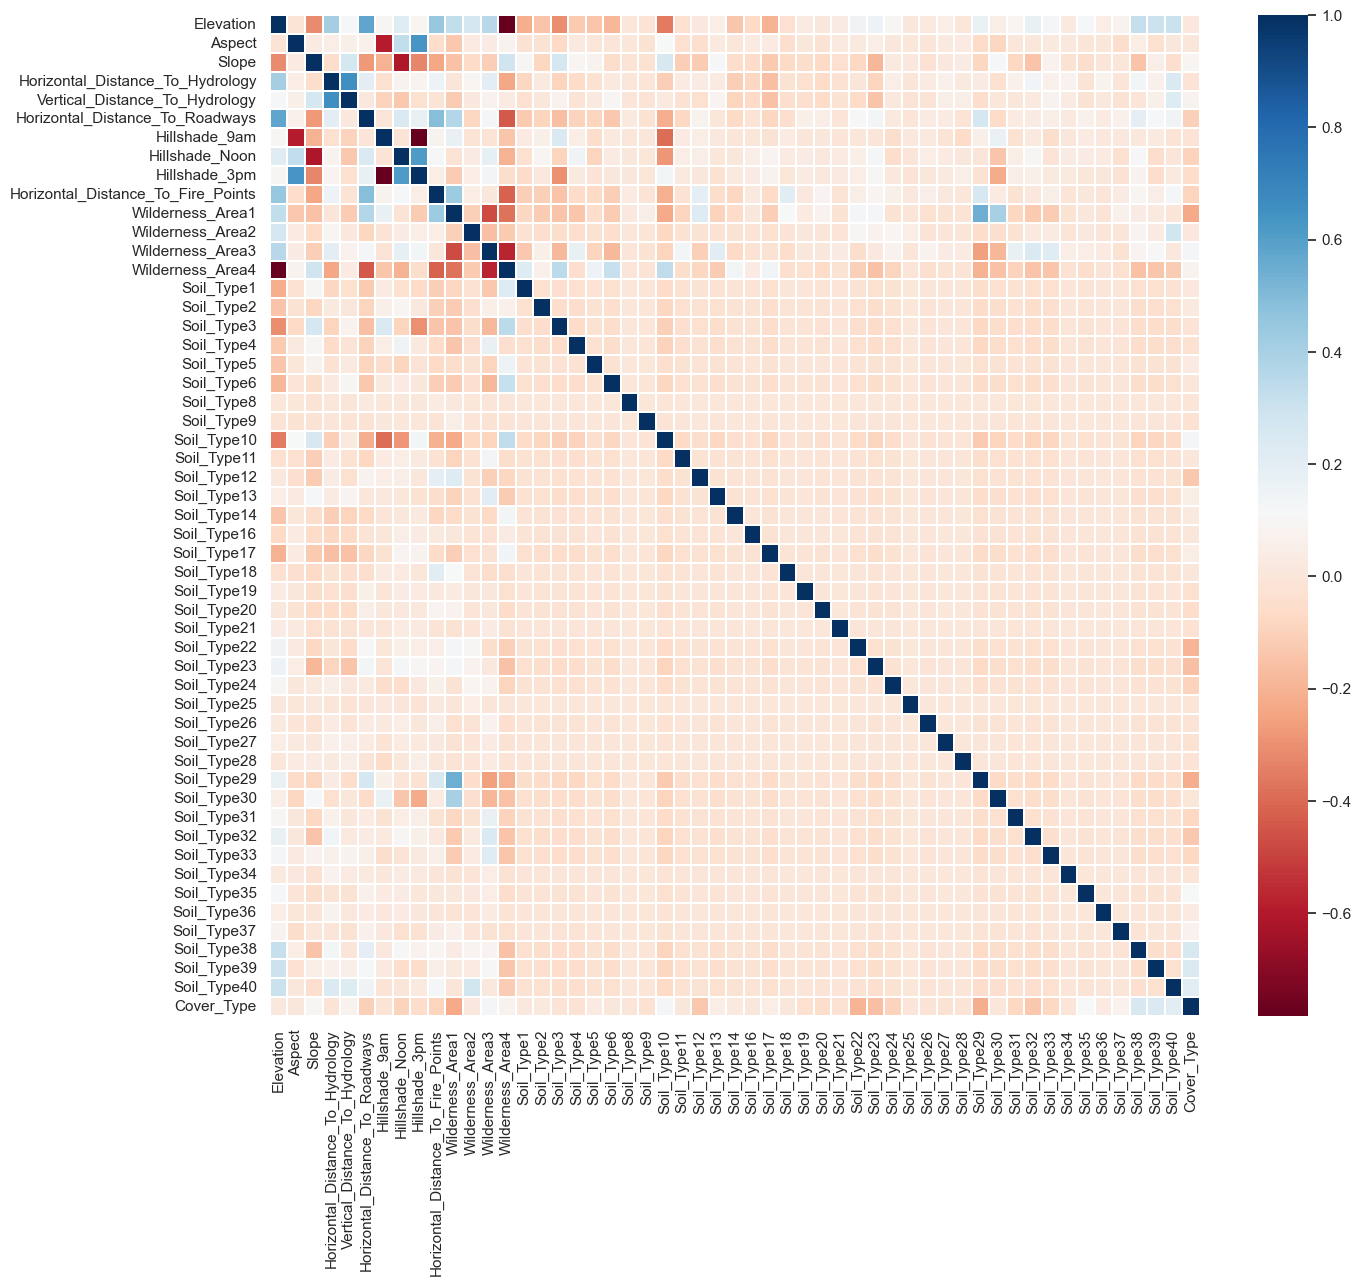

In [10]:
# Check correlation of all variables with target variable
# All soil types individually have very weak correlation with target variable, so let's try combine them
plt.figure(figsize=(15,13))
all_cols_df = d_train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1)
corr = all_cols_df.corr()
sns.heatmap(corr, linewidths=0.1,cmap=plt.cm.RdBu,annot=False, fmt='.2f')

<AxesSubplot: >

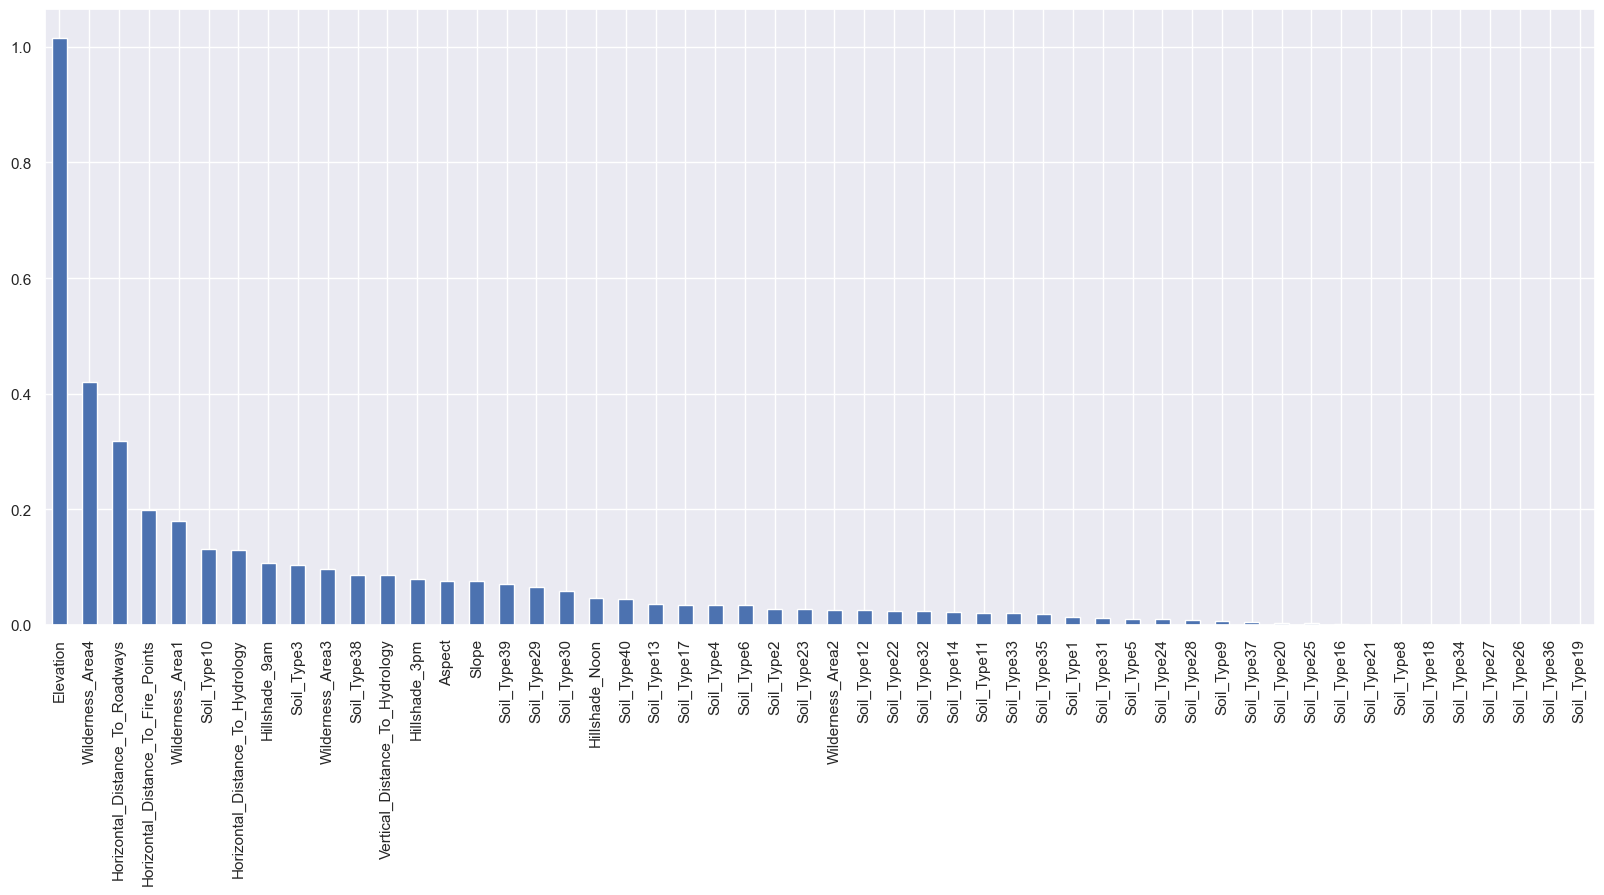

In [11]:
# Initial look at feature importance
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

<AxesSubplot: >

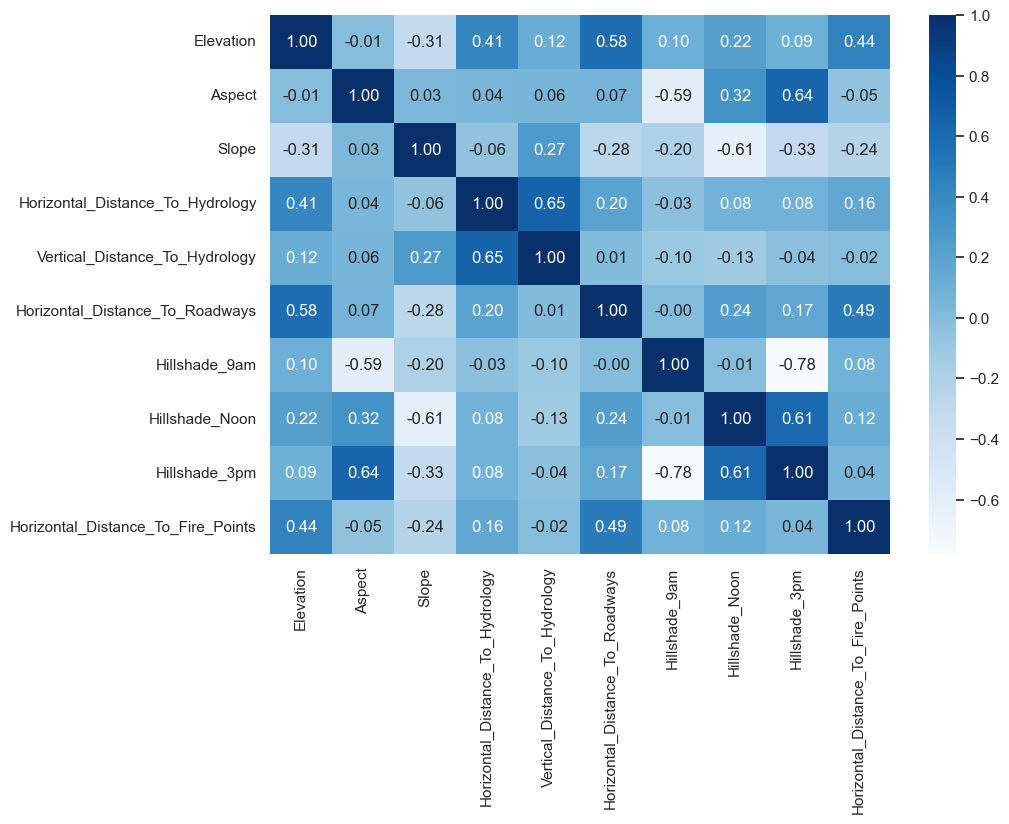

In [12]:
#Check correlations across numerical values
plt.figure(figsize=(10,7))
corr = d_train[numeric_columns].corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')

In [13]:
# Identify highly correlated numerical variables
# Vertical and horizontal distance to hydrology (0.65)
# Hillshade 3am and Hillshae 9pm are colinear (-0.77)
# Elevation and wilderness 4 are highly related (-0.78)

# Low-hanging fruit, combine vertical and horitontal distance to hydrology
# Also drop one of Hillshade 3am/9pm - Drop the less importance Hillshade 3pm based on MI score
X_train_new_features = X_train.copy()
X_train_new_features["Euclid_Dist_To_Hydro"] = (X_train['Horizontal_Distance_To_Hydrology']**2 + X_train['Vertical_Distance_To_Hydrology']**2)**0.5
X_train_new_features["Slope_Hydro"] =  X_train_new_features["Vertical_Distance_To_Hydrology"] / X_train["Horizontal_Distance_To_Hydrology"]
X_train_new_features['Slope_Hydro'] = X_train_new_features['Slope_Hydro'].apply(lambda x: 0 if np.isinf(x) else x)
#X_train_soil_numeric.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)
#X_train_new_features.drop(['Hillshade_3pm'],axis=1,inplace=True)

X_train_new_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Euclid_Dist_To_Hydro,Slope_Hydro
0,0.369084,0.141667,0.056089,0.175723,0.189439,0.071409,0.870079,0.858065,0.596774,0.640747,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.258390,1.078058
1,0.366062,0.155556,0.037740,0.146570,0.182322,0.055060,0.866142,0.877419,0.608871,0.636670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.233931,1.243925
2,0.473817,0.386111,0.159630,0.181949,0.263463,0.379490,0.921260,0.896774,0.544355,0.628771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.320184,1.448001
3,0.464250,0.430556,0.297252,0.165678,0.320011,0.370512,0.937008,0.896774,0.491935,0.635610,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.360356,1.931518
4,0.368580,0.125000,0.037740,0.107889,0.188256,0.055197,0.866142,0.870968,0.604839,0.632652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.216980,1.744908


In [14]:
# Create distance to amenities between the 3 horizontal distances variables ~0.2 correlation

X_train_new_features["Avg_Dist_Hydrology_Roadways"] = (X_train_new_features["Horizontal_Distance_To_Hydrology"] + X_train_new_features["Horizontal_Distance_To_Roadways"])/2
X_train_new_features["Avg_Dist_Hydrology_Firepoints"] = (X_train_new_features["Horizontal_Distance_To_Hydrology"] + X_train_new_features["Horizontal_Distance_To_Fire_Points"])/2
X_train_new_features["Avg_Dist_Roadways_Firepoints"] = (X_train_new_features["Horizontal_Distance_To_Roadways"] + X_train_new_features["Horizontal_Distance_To_Fire_Points"])/2



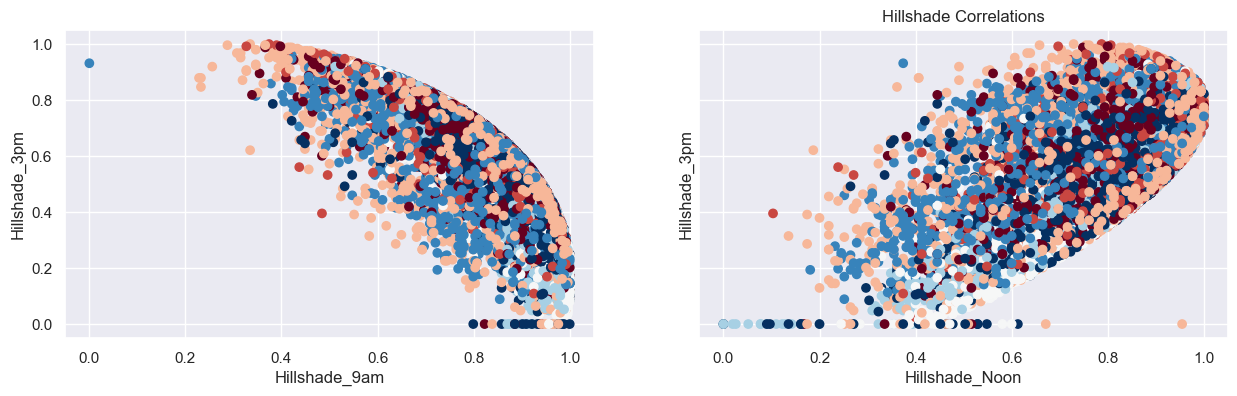

In [15]:
# Deal with Hillshade variables - highly correlated (9am and 3pm -0.78, Noon and 3pm 0.61)
# Hillshade 3pm appears to have lots of 0 values - probablly missing values.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,4))
ax1.scatter(X_train_new_features["Hillshade_9am"],X_train_new_features["Hillshade_3pm"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu)
ax1.set_xlabel("Hillshade_9am")
ax1.set_ylabel("Hillshade_3pm")

ax2.scatter(X_train_new_features["Hillshade_Noon"],X_train_new_features["Hillshade_3pm"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu)
ax2.set_xlabel("Hillshade_Noon")
ax2.set_ylabel("Hillshade_3pm")

plt.title("Hillshade Correlations")
plt.show()


In [16]:
# Create new hillshade features
# how to deal with 0 in hillshare 3pm?
X_train_new_features["Hillshade_9am_3pm_diff"] = X_train_new_features["Hillshade_9am"] - X_train_new_features["Hillshade_3pm"]
X_train_new_features.drop(['Hillshade_3pm'],axis=1,inplace=True)

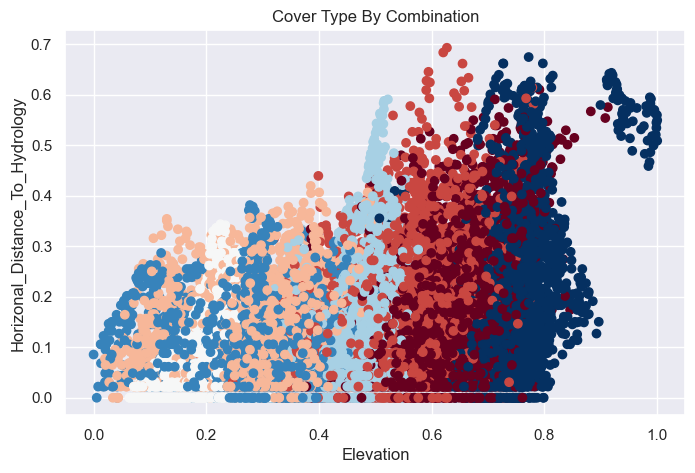

In [17]:
# Elevation has a fairly strong correlation with the 3 horizontal distance variables (0.4+)
# For Random Forest/Tree-based algorithms, try creating combinations of Elevation and the 3 variables

# First try Elevation & Horizontal to dryo (0.41 correlation)
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Hydrology"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Hydrology")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

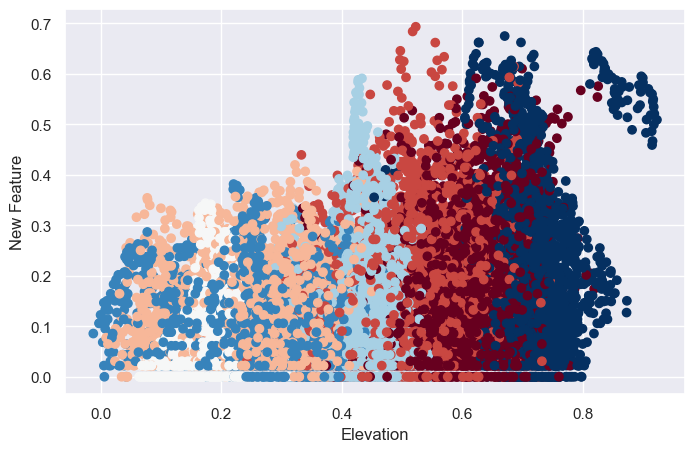

In [18]:
# Creating linear combination for tree algorithm
# Looks like Elevation - 0.15 * Horizontal Hydro makes the cover type linear by new feature
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"]-0.15*X_train_new_features["Horizontal_Distance_To_Hydrology"],X_train_new_features["Horizontal_Distance_To_Hydrology"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("New Feature")
plt.xlabel("Elevation")
plt.show()

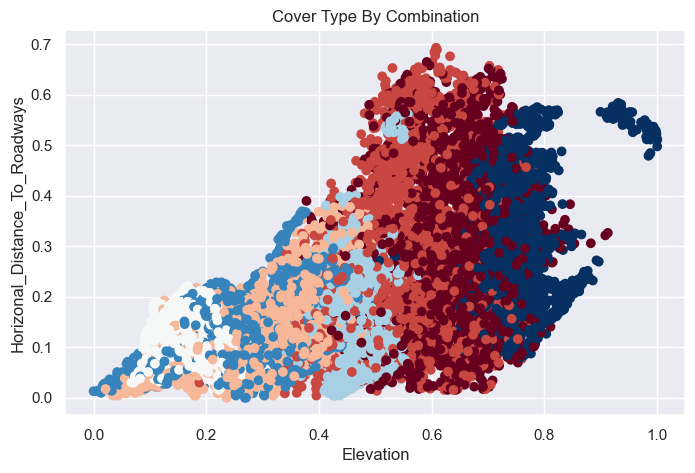

In [19]:
# Elevation & horizontal dist to roadways (0.58 corr)
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Roadways"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Roadways")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

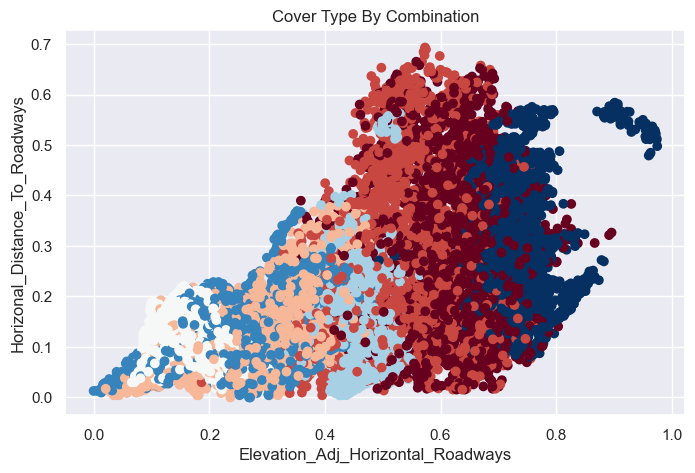

In [20]:
# Elevation - 0.05 * Horizontal_distance_to_roadways seems to make target variable linear vs new feature

plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"]-0.05*X_train_new_features["Horizontal_Distance_To_Roadways"],X_train_new_features["Horizontal_Distance_To_Roadways"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Roadways")
plt.xlabel("Elevation_Adj_Horizontal_Roadways")
plt.title("Cover Type By Combination")
plt.show()

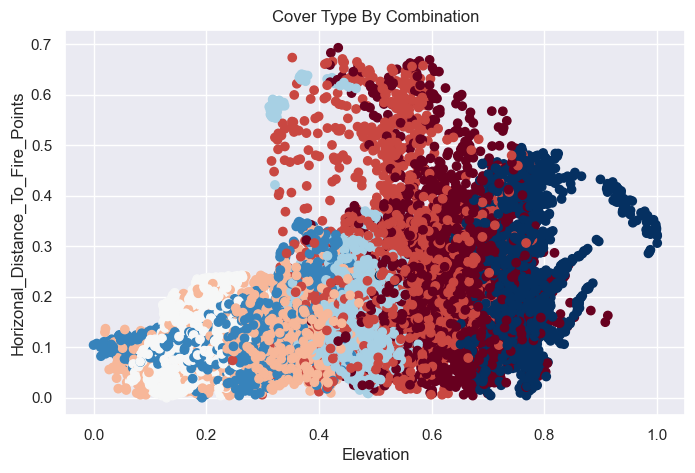

In [21]:
# This looks fine
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Fire_Points"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Fire_Points")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

In [22]:
# Add 2 new features - Elevation adjusted by horizontal distance to Hydro and Roadways
X_train_new_features['Elevation_Adj_Horizontal_Hydro'] = X_train_new_features["Elevation"] - 0.15*X_train_new_features["Horizontal_Distance_To_Hydrology"]
X_train_new_features['Elevation_Adj_Horizontal_Roadways'] = X_train_new_features["Elevation"] - 0.05*X_train_new_features["Horizontal_Distance_To_Roadways"]

In [23]:
#other_soil_to_drop = ['Soil_Type8','Soil_Type14',
 #    'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']
#X_train_new_features.drop(other_soil_to_drop,axis=1,inplace=True)
X_train_new_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Euclid_Dist_To_Hydro,Slope_Hydro,Avg_Dist_Hydrology_Roadways,Avg_Dist_Hydrology_Firepoints,Avg_Dist_Roadways_Firepoints,Hillshade_9am_3pm_diff,Elevation_Adj_Horizontal_Hydro,Elevation_Adj_Horizontal_Roadways
0,0.369084,0.141667,0.056089,0.175723,0.189439,0.071409,0.870079,0.858065,0.640747,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.258390,1.078058,0.123566,0.408235,0.356078,0.273305,0.342725,0.365513
1,0.366062,0.155556,0.037740,0.146570,0.182322,0.055060,0.866142,0.877419,0.636670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.233931,1.243925,0.100815,0.391620,0.345865,0.257271,0.344077,0.363309
2,0.473817,0.386111,0.159630,0.181949,0.263463,0.379490,0.921260,0.896774,0.628771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.320184,1.448001,0.280719,0.405360,0.504130,0.376905,0.446524,0.454842
3,0.464250,0.430556,0.297252,0.165678,0.320011,0.370512,0.937008,0.896774,0.635610,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.360356,1.931518,0.268095,0.400644,0.503061,0.445072,0.439398,0.445724
4,0.368580,0.125000,0.037740,0.107889,0.188256,0.055197,0.866142,0.870968,0.632652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.216980,1.744908,0.081543,0.370271,0.343925,0.261303,0.352397,0.365820


In [24]:
#Based on above correlation matrix, we could try to combine some of the features which have high correlations.

X_train_tighter = X_train_scaled.copy()

#Combine Vertical and Horizontal Distance to hydrology via Euclidian distance
X_train_tighter['Triangular_Dist_To_Hydro'] = (X_train_tighter['Horizontal_Distance_To_Hydrology']**2 + X_train_tighter['Vertical_Distance_To_Hydrology']**2)**0.5
X_train_tighter = X_train_tighter.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis = 1)

X_train_tighter.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Triangular_Dist_To_Hydro
0,0.369084,0.141667,0.080920,0.103021,0.870079,0.858065,0.596774,0.924402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372778
1,0.366062,0.155556,0.054448,0.079434,0.866142,0.877419,0.608871,0.918520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337491
2,0.473817,0.386111,0.230298,0.547488,0.921260,0.896774,0.544355,0.907124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461928
3,0.464250,0.430556,0.428843,0.534536,0.937008,0.896774,0.491935,0.916992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519884
4,0.368580,0.125000,0.054448,0.079633,0.866142,0.870968,0.604839,0.912724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313036


In [25]:
X_train_tighter.shape

(15120, 51)

In [26]:
# 40 soil types data, anyway to simplify?

from sklearn.decomposition import PCA

soil_types = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

pca = PCA()
soil_data = X_train[soil_types]
soil_pca = pca.fit_transform(soil_data)
component_names = [f"PC{i+1}" for i in range(soil_pca.shape[1])]
soil_pca = pd.DataFrame(soil_pca, columns=component_names)

soil_pca.head()
soil_pca.shape

(15120, 38)

array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

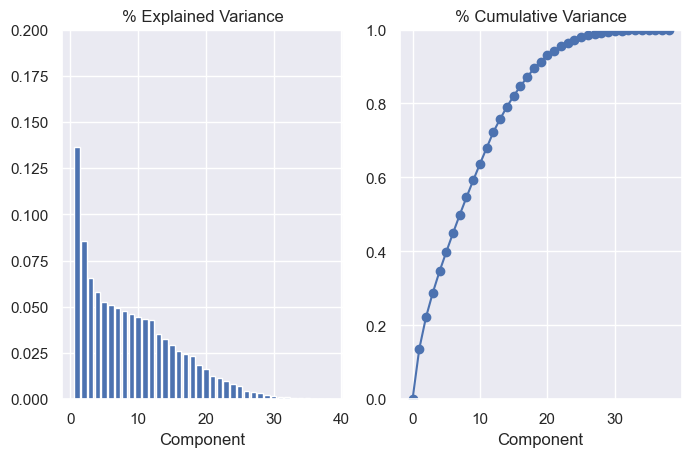

In [27]:
# Explained variance by component
# First 10 components explained 60% of variance of soil types, first 20 components explained over 80%
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 0.2)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca)

In [28]:
#Test using PCA components as features instead of soil types
X_train_pca = X_train_tighter.copy()

X_train_pca= X_train_pca.drop(soil_types, axis = 1)

PCA_list = list(soil_pca.columns)

for i in range(0,20):
    X_train_pca[PCA_list[i]] = soil_pca[PCA_list[i]]

X_train_pca.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Triangular_Dist_To_Hydro,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.369084,0.141667,0.080920,0.103021,0.870079,0.858065,0.596774,0.924402,1.0,0.0,0.0,0.0,0.372778,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725
1,0.366062,0.155556,0.054448,0.079434,0.866142,0.877419,0.608871,0.918520,1.0,0.0,0.0,0.0,0.337491,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725
2,0.473817,0.386111,0.230298,0.547488,0.921260,0.896774,0.544355,0.907124,1.0,0.0,0.0,0.0,0.461928,-0.100685,-0.061215,-0.035431,-0.028357,-0.013246,-0.002119,0.020511,-0.020778,-0.005736,0.017995,-0.005943,0.003418,0.069445,0.023782,0.060408,0.085566,0.027780,0.032605,0.220462,0.954233
3,0.464250,0.430556,0.428843,0.534536,0.937008,0.896774,0.491935,0.916992,1.0,0.0,0.0,0.0,0.519884,-0.141793,-0.122407,-0.119708,-0.170903,-0.286749,-0.689904,-0.517576,0.192502,0.034241,-0.082212,0.022151,-0.011865,-0.085034,-0.021955,-0.037957,-0.035341,-0.009063,-0.009132,-0.018777,-0.012315
4,0.368580,0.125000,0.054448,0.079633,0.866142,0.870968,0.604839,0.912724,1.0,0.0,0.0,0.0,0.313036,-0.264553,0.899214,0.070275,0.036260,0.012763,0.001875,-0.016795,0.015198,0.003838,-0.011217,0.003476,-0.001951,-0.024101,-0.006892,-0.013315,-0.013561,-0.003615,-0.003720,-0.008407,-0.005725


In [29]:
X_train_pca.shape

(15120, 33)

In [30]:
#Update model build function
def build_my_model(average_over_positions=False,
                           input_size=1000,
                           input_length=20):
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())
  
  #Add my layer
  model.add(tf.keras.layers.Dense(units=1024, activation = 'relu', name = 'relu1'))
  #model.add(tf.keras.layers.Dense(units=256, activation = 'relu', name = 'relu2'))
  model.add(tf.keras.layers.Dense(units=128, activation = 'relu', name = 'relu3'))
  model.add(tf.keras.layers.Dense(units=32, activation = 'relu', name = 'relu4'))
  #model.add(tf.keras.layers.Dense(1024, input_shape = (51,), activation = 'relu', kernel_initializer='he_uniform'))
  #model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.Dense(8, activation='tanh'))

  model.add(tf.keras.layers.Dense(
      units=8,
      activation = tf.keras.activations.softmax
  ))

  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [31]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

Epoch 1/15
213/213 [==============================] - 1s 3ms/step - loss: 1.2542 - accuracy: 0.5549 - val_loss: 1.0653 - val_accuracy: 0.6627
Epoch 2/15
213/213 [==============================] - 0s 2ms/step - loss: 0.9545 - accuracy: 0.6625 - val_loss: 0.9062 - val_accuracy: 0.7037
Epoch 3/15
213/213 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.6905 - val_loss: 0.8406 - val_accuracy: 0.7123
Epoch 4/15
213/213 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.7079 - val_loss: 0.7766 - val_accuracy: 0.7269
Epoch 5/15
213/213 [==============================] - 0s 2ms/step - loss: 0.7484 - accuracy: 0.7114 - val_loss: 0.7505 - val_accuracy: 0.7302
Epoch 6/15
213/213 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.7211 - val_loss: 0.7313 - val_accuracy: 0.7176
Epoch 7/15
213/213 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.7290 - val_loss: 0.7652 - val_accuracy: 0.7004
Epoch 

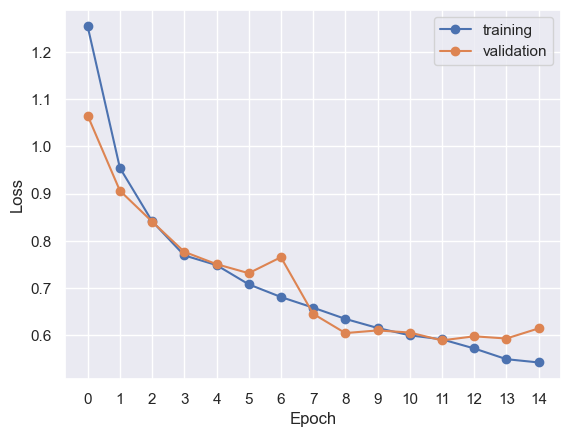

In [32]:
tf.random.set_seed(1234)

model = build_my_model(average_over_positions=False,
                               input_size = 15120,
                               input_length = 51)
history = model.fit(
  x = X_train_pca,    # training data
  y = y_train,          # corresponding labels
  epochs = 15,             # number of passes through the training data
  batch_size = 64,        # mini-batch size
  validation_split = 0.1, # use a fraction of the examples for validation
  verbose = 1             # display some progress output during training
  )

history = pd.DataFrame(history.history)
plot_history(history)

#model.evaluate(X_test_small, Y_test)

In [71]:
# Try a bunch of baseline models
# First split a portion of data for validation
from sklearn.model_selection import train_test_split
X_train_original, X_val_original, y_train_original, y_val_original = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_train_new_features,y_train,test_size=0.2,random_state=1)

print(X_train_new.shape)
print(X_val_new.shape)
print(y_train_new.shape)
print(y_val_new.shape)


(12096, 59)
(3024, 59)
(12096,)
(3024,)


In [72]:
# Import all models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [73]:
# Baseline accuracy by model
def accuracy_score_by_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    model_pred = model.predict(X_val)
    model_score = accuracy_score(y_val,model_pred)
    return model_score

def baseline_accuracy_by_dataset(model_list,X_train,y_train,X_val,y_val):
    accuracy_list = []
    for model in model_list:
        #if model == neu:
            #accuracy = model.evaluate(X_val,y_val,verbose=0)[1]
        if model == xgb:
            accuracy = accuracy_score_by_model(model,X_train,y_train-1,X_val,y_val-1)
        else:
            accuracy = accuracy_score_by_model(model,X_train,y_train,X_val,y_val)
        print("Baseline Validation Accuracy is",(model,accuracy))
        accuracy_list.append(accuracy)
    return accuracy_list

gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
rfr = RandomForestClassifier()
#neu = model
svc = SVC()
xgb = XGBClassifier()
model_list = [gnb,knn,rfr,svc,xgb]


accuracy_new_data = baseline_accuracy_by_dataset(model_list,X_train_new,y_train_new,X_val_new,y_val_new)


Baseline Validation Accuracy is (GaussianNB(), 0.47883597883597884)
Baseline Validation Accuracy is (KNeighborsClassifier(n_neighbors=7), 0.7275132275132276)
Baseline Validation Accuracy is (RandomForestClassifier(), 0.8680555555555556)
Baseline Validation Accuracy is (SVC(), 0.6977513227513228)
Baseline Validation Accuracy is (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=No

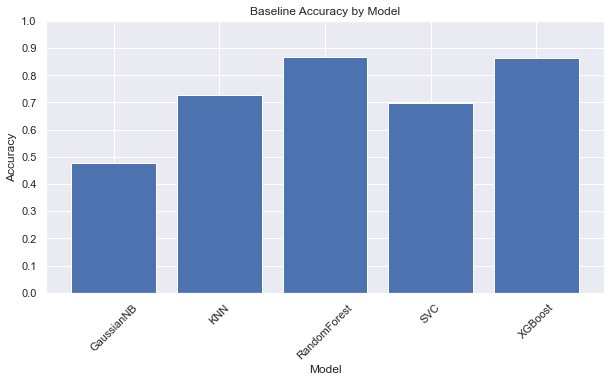

In [74]:
def plot_accuracy(model_list,accuracy_list):
    plt.figure(figsize=(10,5))
    plt.bar(model_list,accuracy_list)
    plt.title("Baseline Accuracy by Model")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.ylabel("Accuracy")
    plt.show()

model_name_list = ['GaussianNB','KNN','RandomForest','SVC','XGBoost']
plot_accuracy(model_name_list,accuracy_new_data)


In [77]:
# Random Forest and XGB tied with 0.86 accuracy 
# Picked Random Forest for hyperparamter tuning; also due to better interpretability on feature importance
from sklearn.model_selection import GridSearchCV

# Base learner
rfr_tuned = RandomForestClassifier(random_state=1)

# Hyperparameters

param_dist = {
    "n_estimators":[100,300,500],
    #"max_depth":range(8,14),
    "max_features":[0.5,'sqrt']
   #"min_samples_split":[2,5,10],
    #"min_samples_leaf":[1,2,4]
}

rf_grid = GridSearchCV(
    estimator=rfr_tuned,
    param_grid=param_dist,
    cv=5,
    n_jobs=4
)

rf_grid.fit(X_train_new,y_train_new)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_features': 'sqrt', 'n_estimators': 500}
0.8622684737563162


In [78]:
rf_best = RandomForestClassifier(max_depth=None, max_features = 'sqrt',n_estimators=500, random_state=2, verbose=0)
accuracy_score_by_model(rf_best,X_train_new,y_train_new,X_val_new,y_val_new)

0.8687169312169312

In [79]:
# feature importance
rf_best.fit(X_train_new_features,y_train)
feature_importance = pd.DataFrame(rf_best.feature_importances_,index=X_train_new_features.columns,columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

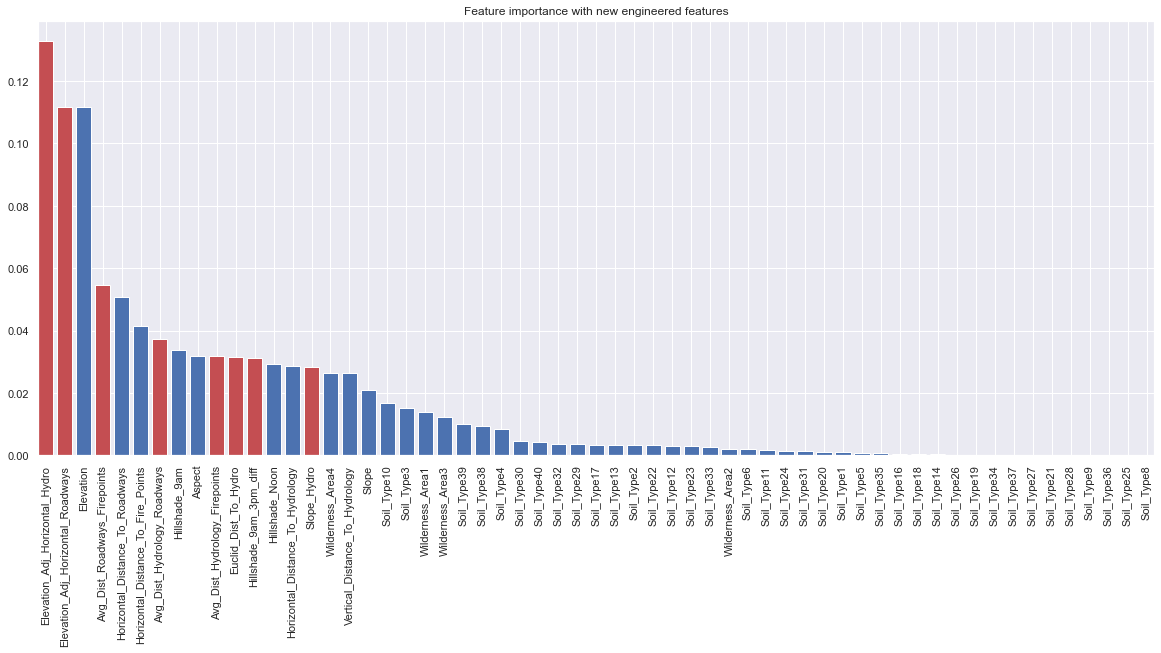

In [80]:
# Most engineered features ranked near the top
engineered_features = X_train_new.iloc[:,-8:].columns

#highlight engineered features by different color
feature_importance['color'] = ['r' if x in engineered_features else 'b' for x in feature_importance.index]
plt.figure(figsize=(20,8))
plt.bar(feature_importance.index,feature_importance.Importance,color=feature_importance.color)
plt.xticks(rotation=90)
plt.margins(x=0)

plt.title("Feature importance with new engineered features")
plt.show()


In [81]:
# what features to drop?
# drop features with importance < 0.001 improved accurracy by ~1%
low_priority_features = feature_importance[feature_importance['Importance']<0.001].index
X_train_new_and_select = X_train_new.drop(low_priority_features,axis=1)
X_val_new_and_select = X_val_new.drop(low_priority_features,axis=1)

# retrain model
rf_best_feature_select = RandomForestClassifier(max_depth=14, n_estimators=500, random_state=222, verbose=0)
accuracy_score_by_model(rf_best_feature_select,X_train_new_and_select,y_train_new,X_val_new_and_select,y_val_new)

0.8468915343915344

In [82]:
# Compare accuracy on original vs new datasets
model_list = [gnb,knn,rfr,svc,xgb]
accuracy_original = baseline_accuracy_by_dataset(model_list,X_train_original,y_train_original,X_val_original,y_val_original)
accuracy_new_and_select = baseline_accuracy_by_dataset(model_list,X_train_new_and_select,y_train_new,X_val_new_and_select,y_val_new)

Baseline Validation Accuracy is (GaussianNB(), 0.4728835978835979)
Baseline Validation Accuracy is (KNeighborsClassifier(n_neighbors=7), 0.7843915343915344)
Baseline Validation Accuracy is (RandomForestClassifier(), 0.8617724867724867)
Baseline Validation Accuracy is (SVC(), 0.7159391534391535)
Baseline Validation Accuracy is (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=Non

In [83]:
# Plot accuracy on original vs new datasets
accuracy_comp = pd.DataFrame({'Original':accuracy_original,'New':accuracy_new_data,'New_and_Select':accuracy_new_and_select},index=['GaussianNB','KNN','RandomForest','SVC','XGBoost'])
accuracy_comp

,Original,New,New_and_Select
GaussianNB,0.472884,0.478836,0.486111
KNN,0.784392,0.727513,0.723214
RandomForest,0.861772,0.868056,0.867394
SVC,0.715939,0.697751,0.701389
XGBoost,0.851190,0.862765,0.865741


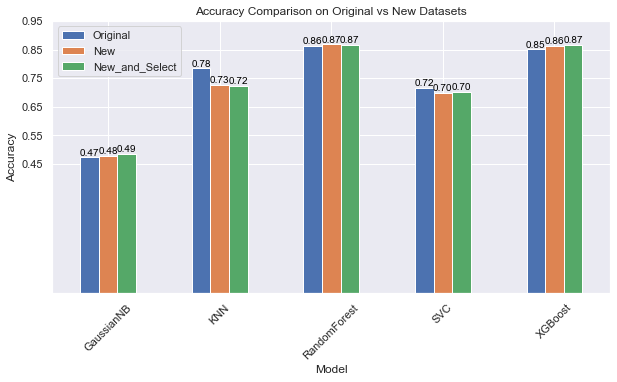

In [84]:
# plot accuracy_comp side-by-side bar chart
accuracy_comp.plot(kind='bar',figsize=(10,5))
plt.title("Accuracy Comparison on Original vs New Datasets")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.yticks(np.arange(0.45,1,0.1))
plt.ylabel("Accuracy")
#add value labels
for p in plt.gca().patches:
    plt.gca().text(p.get_x()+p.get_width()/2., p.get_height(), '{:1.2f}'.format(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
            # convert label to percentage
plt.show()

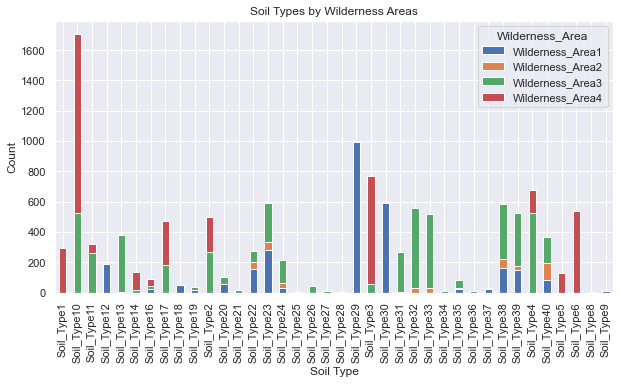

In [85]:
# More EDA visualization
# plot soil types by wilderness areas
soil_type = [x for x in X_train_new.columns if 'Soil_Type' in x]
wilderness_area = [x for x in X_train_new.columns if 'Wilderness_Area' in x]

# convert 4 wilderness areas to 1 column
X_train_new['Wilderness_Area'] = X_train_new[wilderness_area].idxmax(axis=1)
X_val_new['Wilderness_Area'] = X_val_new[wilderness_area].idxmax(axis=1)
X_train_new['Soil_Type_Num'] = X_train_new[soil_type].idxmax(axis=1)
X_val_new['Soil_Type_Num'] = X_val_new[soil_type].idxmax(axis=1)

#Plot soil types by wilderness areas
X_train_new['Wilderness_Area'].groupby(X_train_new['Soil_Type_Num']).value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
plt.title("Soil Types by Wilderness Areas")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()


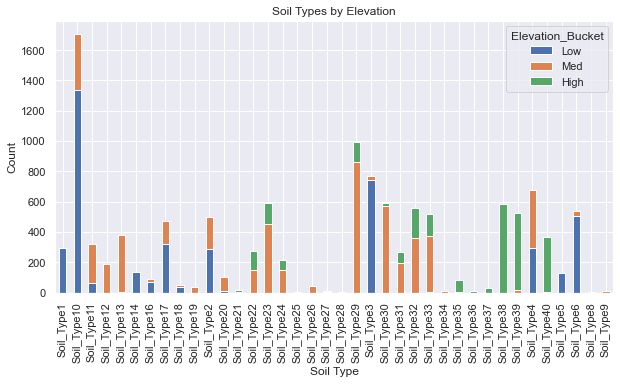

In [86]:
# More EDA visualization
# Interesting to see most soil types have 1 pre-dominant elevation

# Bucket elevation into 2 groups
X_train_new['Elevation_Bucket'] = pd.cut(X_train_new['Elevation'],3,labels=['Low','Med','High'])

# Plot soil type counts in each elevation budget
X_train_new['Elevation_Bucket'].groupby(X_train_new['Soil_Type_Num']).value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
plt.title("Soil Types by Elevation")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()


<AxesSubplot: >

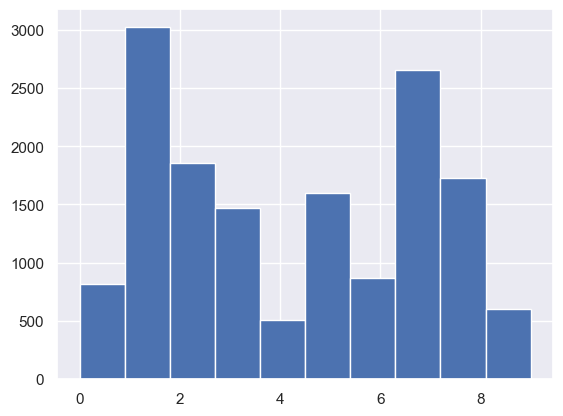

In [50]:
#Let's try K-Means Clustering on the 3 variables about hillshade
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid

n_clusters = 10
random_state = 10

#Make nparray to be used as input to KMeans implementation in sklearn
KMeans_input = np.array(X_train[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].values)

def fit_kmeans(X, n_clusters, random_state):
  model = KMeans(n_clusters = n_clusters, random_state = random_state, n_init="auto").fit(X)
  return model

model = fit_kmeans(KMeans_input, n_clusters, random_state)

#Make DataFrame with output
KMeans_output = pd.DataFrame(data = KMeans_input, columns = ['9am', 'Noon', '3pm'])
KMeans_output['cluster'] = model.predict(KMeans_input)
KMeans_output['cluster'].hist()

In [51]:
centroids = model.cluster_centers_
centroids

#Biggest clusters are class 1 and 7. Both have high values for 9am and Noon, and lower values comparatively for 3pm.
#Outliers (0 scores for 3pm) might impact this analysis.
#It would be important to get further fundamental understanding of 0 values, their background and veracity.
#These can drive the model.

array([[0.94992648, 0.4725212 , 0.14363557],
       [0.87549196, 0.89315728, 0.59592032],
       [0.95670782, 0.67294265, 0.31390333],
       [0.73783751, 0.77880998, 0.68757254],
       [0.56029962, 0.58902071, 0.72243956],
       [0.82673221, 0.71092573, 0.53566415],
       [0.58116398, 0.83098853, 0.86663852],
       [0.93475564, 0.80946542, 0.45857374],
       [0.7679718 , 0.9472038 , 0.74804275],
       [0.76493166, 0.46765563, 0.40404844]])